<a href="https://colab.research.google.com/github/domysolano/GridSpec-Sales-Analysis/blob/main/GridSpec_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial y Analítica de Datos**

Curso: *Programación para Analítica Descriptiva y Predictiva*

* Semestre: Enero-Junio 2026
* Profesor: Dr. Vicente García Jiménez
* Alumno: Ricardo Solano Monje
* Matrícula: 266221
* Unidad 1
* Práctica 10: Análisis de Ventas con GridSpec.
* Objetivo de la práctica: Utilizar GridSpec para organizar subplots de diferentes tamaños dentro de una misma figura, específicamente para un análisis de ventas.
* Realizado por: Ricardo Solano Monje

# Práctica 10: Análisis de Ventas con GridSpec
**Objetivo**:

Utilizar GridSpec para organizar subplots de diferentes tamaños en un análisis de ventas.

Instrucciones:

* Genera un DataFrame de ventas con Mes, Ventas, y Gastos. Utiliza randint para generar números aleatorios enteros.
  * Para ventas los valores deben estar entre 2000 y 5000.
  * Para gastos, los valores debn estar entre 1000 y 4000.
* Usa GridSpec para organizar los subplots de la siguiente manera:
    * Primer gráfico (barra, ocupando dos columnas)
    * Segundo gráfico (línea, una columna)
    * Tercer gráfico (dispersión, dos filas).
* Agrega títulos y ajusta espacios.

### Meaning of Each plot:

* Bar chart - top row, both columns.
  * It Shows how sales and expenses are balanced in each month. Since the bars are side by side, it helps us compare expenses and profits simultaneously.  
* Line chart - middle left one column.
  * It shows how expenses and sales behave over the months. It behaves like comparing two time series.
* Scatter plot spans two rows as requested, middle and bottom right (second column, 2 rows).
  * It places a point on the graph whose coordinates are (sales, expenses). Each point corresponds to a month, so it can have a unique color.

### GridSpec
is a Matplotlib class used to create flexible grid layouts that allow multiple subgraphs to be placed within a single figure.

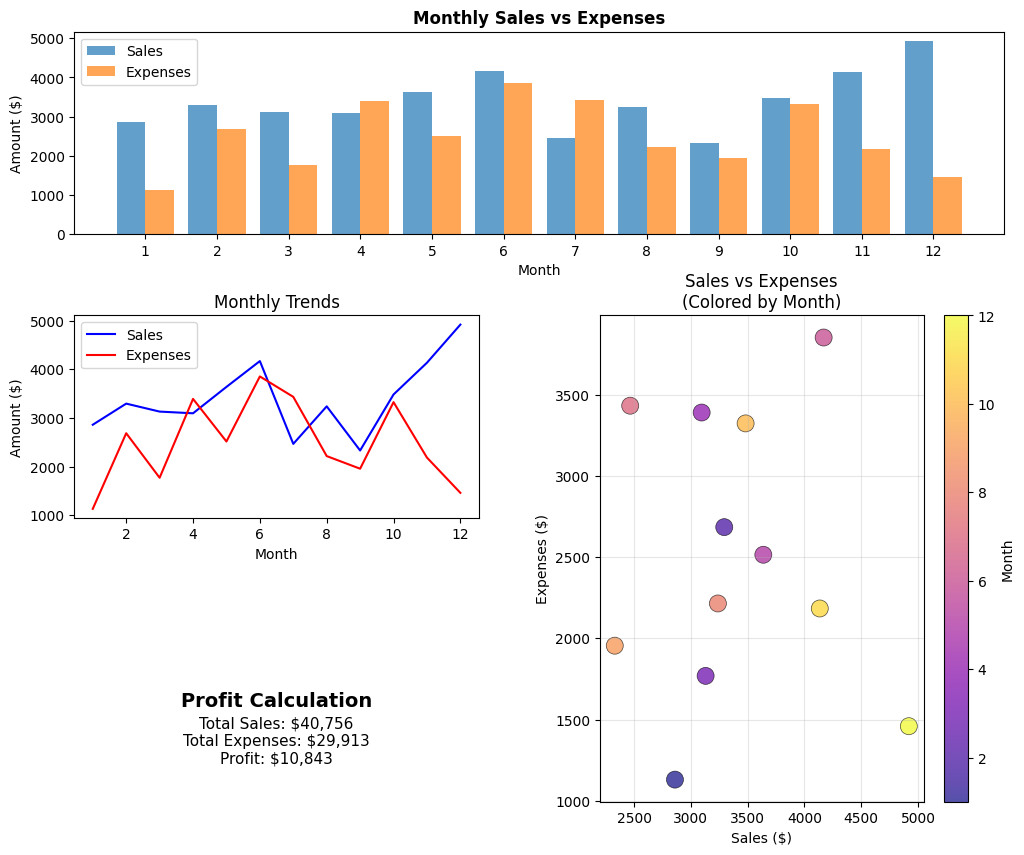

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
"""
The following parameters have been specifically selected to meet the requirements.
Some others may have been omitted from this header by forgetting them.
In line charts, markers were avoid as suggested in the classroom. I can be accomplish by seting marker = ' ' or by
making to plot just color 'b' as was done in this code case.

 ax1.set_title() the plot title
    ax1.set_xlabel x axis label
    ax1.set_ylabel y axis label
    ax1.set_xticks
    ax1.set_xticklabels  setting x axis sticks labels
    ax1.legend() setting the bar chart's legend as well of line chart's legend
    ax1.grid() to show grid and its color intensity
    plt.colorbar() parameter to coloring bar chart's colors

"""

def generate_sales_data(months=12, seed=42):
    """Generate random sales and expenses data.
    Genera un DataFrame de ventas con Mes, Ventas y Gastos.
    Utiliza randint para generar números aleatorios enteros.
    """
    np.random.seed(seed)
    return pd.DataFrame({
        'Month': range(1, months + 1), #month is not randomly generated, rather use range (1,13)
        'Sales': np.random.randint(2000, 5001, months), #Para ventas los valores deben estar entre 2000 y 5000.
        'Expenses': np.random.randint(1000, 4001, months) #Para gastos, los valores deben estar entre 1000 y 4000.
    })

# GRID OF SUBPLOTS: 3 rows and 2 columns

def create_alternate_grid(df, figsize=(12, 10),file_path=None): # Save if file path provided
    """Explicit GridSpec layout:
    Scatter plot spans two rows as requested.
    """
    fig = plt.figure(figsize=figsize)

    # Create custom grid: 3 rows, 2 columns
    # Row 0: bar chart spanning both columns, Primer gráfico (barra, ocupando dos columnas)
    # Rows 1-2: line chart (left) Segundo gráfico (línea, una columna)
    # and scatter plot (right, spanning both rows (2)) Tercer gráfico (dispersión, dos filas).
    gs = gridspec.GridSpec(3, 2,
                          height_ratios=[1, 1, 1],
                          hspace=0.4, wspace=0.3)

    # Bar chart - top row, both columns
    # Show how sales and expenses are balanced in each month.
    ax1 = plt.subplot(gs[0, :]) #first row , all columns
    x = np.arange(len(df))
    ax1.bar(x - 0.2, df['Sales'], 0.4, label='Sales', alpha=0.7)
    ax1.bar(x + 0.2, df['Expenses'], 0.4, label='Expenses', alpha=0.7)
    ax1.set_title('Monthly Sales vs Expenses', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Amount ($)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Month'])
    ax1.legend()
    #ax1.grid(True, alpha=0.3)

    # Line chart - middle left
    # It shows how expenses and sales behave over the months.
    #  markers were avoid as suggested in the classroom
    # no grid needed, so by default is False
    ax2 = plt.subplot(gs[1, 0]) #second row, one column
    ax2.plot(df['Month'], df['Sales'], 'b', label='Sales') #no markers for each point, just color 'b'
    ax2.plot(df['Month'], df['Expenses'], 'r', label='Expenses')
    ax2.set_title('Monthly Trends')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Amount ($)')
    ax2.legend()
    #ax2.grid(True, alpha=0.3)

    """
        Scatter plot spans two rows as requested,
         middle and bottom right (spanning 2 rows, second column)
    """
    # Position a point on the plot whose coordinates are (sales, expenses).
    # A point corresponds to a month, therefore it can be colored uniquely.
    ax3 = plt.subplot(gs[1:, 1])  # From row 1 to end, column 1, all rows 1:, one column, the right column
    # to hide points as suggested in the course, set s=0
    scatter = ax3.scatter(df['Sales'], df['Expenses'],
                         c=df['Month'], s=150, alpha=0.7,
                         cmap='plasma', edgecolors='black', linewidth=0.5) #Matplotlib provides a variety of built-in colormaps
                                                                            #like 'viridis', 'plasma', 'RdBu', or 'Blues'.
    ax3.set_title('Sales vs Expenses\n(Colored by Month)')
    ax3.set_xlabel('Sales ($)')
    ax3.set_ylabel('Expenses ($)')
    plt.colorbar(scatter, ax=ax3, label='Month') # set plasma color for visualizing a third variable in a scatter plot using color mapping.
    ax3.grid(True, alpha=0.3)

    # FOUR subplot for bottom left , one row, one column USING AS TEXT PLOTTING
    # TEXT: Summary Stats, total sales, total expenses, profit...
    # TOTAL SALES equals sum(Sales series), OTAL EXPENSES equals sum(Expenses series)
    # total profit equals (TOTAL SALES)-(TOTAL EXPENSES)
    ax4 = plt.subplot(gs[2, 0]) #row 1, column 1, one row and one column
    ax4.text(0.5, 0.5, 'Profit Calculation',
            ha='center', va='center', fontsize=14, fontweight='bold')
    ax4.text(0.5, 0.3, f"Total Sales: ${df['Sales'].sum():,}\nTotal Expenses: ${df['Expenses'].sum():,}\nProfit: ${df['Sales'].sum() - df['Expenses'].sum():,}",
            ha='center', va='center', fontsize=11)
    ax4.axis('off')
    # Save if file path provided
    if file_path:
        plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.show()
    return fig

def main():
    df = generate_sales_data()
    fig = create_alternate_grid(df,file_path='Sales_vs_Expenses.png') # Save if file path provided
    return df

if __name__ == "__main__":
    df = main()